In [1]:
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt


from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

%matplotlib inline

In [2]:
#load data, change data_path if necessary
training_data_path = 'training_data.csv'
macro_data_path = 'macro_data.csv'
forecast_starting_data_path = 'forecast_starting_data.csv'

training_data = pd.read_csv(training_data_path)
macro_data = pd.read_csv(macro_data_path)
forecast_starting_data = pd.read_csv(forecast_starting_data_path)

/Users/wenbofu/miniforge3/envs/torch_m1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
training_data.head()

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B


In [4]:
macro_data.head()

,Mnemonic,M_FHOFHOPIPOQ.IUSA,M_FYLE.IUSA,M_FRT.IUSA,M_FYPSAVQ.IUSA,M_FC.IUSA,FYPCPICA_FEDB.IUSA,M_FGDP.IUSA,M_FYHHAVGQ.IUSA,M_FYFMMEDQ.IUSA,...,M_FBCFCOFCCQ.IUSA,M_FETP.IUSA,M_FLTV.IUSA,M_FC$.IUSA,M_FEIAMGTTQ.IUSA,M_FXCPMGASUQ.IUSA,M_FRBBBQ.IUSA,M_FHOWNRQ.IUSA,M_FIFR_FEDS.IUSA,M_FIFR$_FEDS.IUSA
0,Description,Baseline Scenario (October 2022): FHFA Purchas...,Baseline Scenario (October 2022): NIPA: Income...,Baseline Scenario (October 2022): Retail Sales...,Baseline Scenario (October 2022): Income: Pers...,Baseline Scenario (October 2022): NIPA: Person...,Baseline Scenario (October 2022): Income: Per ...,Baseline Scenario (October 2022): NIPA: Gross ...,Baseline Scenario (October 2022): Average Hous...,Baseline Scenario (October 2022): Median Famil...,...,Baseline Scenario (June 2020): Charge Off Rate...,Baseline Scenario (June 2020): Employment: Tot...,Baseline Scenario (June 2020): Terms Conventio...,Baseline Scenario (June 2020): NIPA: Personal ...,Baseline Scenario (June 2020): U.S. All Grades...,Baseline Scenario (June 2020): Motor gasoline ...,Baseline Scenario (June 2020): Merrill Lynch 1...,Baseline Scenario (June 2020): Homeownership R...,FRB CCAR 2020 - Severely Adverse: NIPA: Fixed ...,FRB CCAR 2020 - Severely Adverse: NIPA: Fixed ...
1,Name,"FHFA Purchase-Only Home Price Index, (Index 19...","NIPA: Income - Compensation of Employees, (Bil...","Retail Sales - Retail Sales Total, (Bil. USD, ...","Income: Personal - Saving Rate, (%, SA)",NIPA: Personal Consumption Expenditures - Tota...,"Income: Per Capita Income, (USD)","NIPA: Gross Domestic Product, (Bil. USD, SAAR)","Average Household Income: All Races, (USD, SA)","Median Family Income: All Races, (USD, SA)",...,Charge Off Rates: All Commercial Banks - Credi...,"Employment: Total Private, (Mil. #, SA)",Terms Conventional Mortgages: All Loans - Comp...,NIPA: Personal Consumption Expenditures - Tota...,U.S. All Grades All Formulations Retail Gasoli...,"Motor gasoline prices: Unleaded, (Cents per ga...","Merrill Lynch 10-Year Bbb Corporate Bond Rate,...","Homeownership Rate, (%, SA)","NIPA: Fixed Investment - Residential - Total, ...","NIPA: Fixed Investment - Residential - Total, ..."
2,Source,U.S. Federal Housing Finance Agency (FHFA); Fr...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Census Bureau (BOC); U.S. Bureau of Econo...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,...,U.S. Board of Governors of the Federal Reserve...,U.S. Bureau of Labor Statistics (BLS); Moody's...,U.S. Federal Housing Finance Board (FHFB); Moo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Energy Information Administration (EIA); ...,Oil Price Information Service (OPIS); Moody's ...,U.S. Board of Governors of the Federal Reserve...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...
3,Native Frequency,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,ANNUAL,MONTHLY,MONTHLY,MONTHLY,...,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY
4,Geography,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


In [5]:
forecast_starting_data.head()

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,T,0,0,I 0-6,1.0,761+,NaN,42,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202001,202001,B
1,0.0,P,0,0,A,1.0,761+,NaN,48,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202001,202001,B
2,0.0,C,0,0,I 0-6,0.0,761+,NaN,244,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202001,202001,A
3,1.0,R,0,0,I 0-6,1.0,621-640,NaN,76,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202001,202001,A
4,1.0,P,0,0,I 0-6,1.0,761+,NaN,143,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202001,202001,C


In [6]:
# About the relation between training data and forecast data
# they have the same columns
set(training_data.columns.to_list()) == set(forecast_starting_data.columns.to_list()) 

True

In [7]:
#but the 'charge_off' columns contain different information
training_data['charge_off'].value_counts()

0    5742525
1      15698
Name: charge_off, dtype: int64

In [8]:
# we want to predict the value of this column in the forecast data
forecast_starting_data['charge_off'].value_counts()

0    19866
Name: charge_off, dtype: int64

In [9]:
#time information is stored in the 'snapshot' column
training_data['snapshot'].value_counts()

201801    456559
201802    438850
201803    419960
201804    400376
201805    383020
201806    362501
201807    343775
201808    325400
201809    305682
201810    286587
201811    268387
201812    249851
201901    231167
201902    213310
201903    193615
201904    174622
201905    156375
201906    136424
201907    117137
201908     98131
201909     78401
201910     58924
201911     39424
201912     19745
Name: snapshot, dtype: int64

In [10]:
forecast_starting_data['snapshot'].value_counts()

202001    19866
Name: snapshot, dtype: int64

# Incorporate macro data

In [11]:
# use 'snapshot' as timestamp and compute charge_off frequency for each month

train_snapshot = training_data[['snapshot','charge_off']].groupby('snapshot').sum()/training_data[['snapshot','charge_off']].groupby('snapshot').count()

In [12]:
# convert string in 'Menmonic' to integer datatype
def convert_to_snapshot(datastring):
    month,day,year = datastring.split('/')
    if int(month)<10:
        month = '0'+month
    return int(year+month)

In [13]:
# data starts from row 7
macro_data_clean = macro_data.iloc[7:,:]

In [14]:
macro_data_clean['snapshot']=macro_data_clean['Mnemonic'].apply(lambda df: convert_to_snapshot(df))

/var/folders/55/mk0vxtps7kz9rhknst5w8rjr0000gn/T/ipykernel_87055/1217069992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_data_clean['snapshot']=macro_data_clean['Mnemonic'].apply(lambda df: convert_to_snapshot(df))


In [15]:
# combine train data with macro data on the 'snapshot' column
train_macro_combined = train_snapshot.merge(macro_data_clean,on='snapshot').drop('Mnemonic',axis=1)

In [16]:
train_macro_combined.head()

,snapshot,charge_off,M_FHOFHOPIPOQ.IUSA,M_FYLE.IUSA,M_FRT.IUSA,M_FYPSAVQ.IUSA,M_FC.IUSA,FYPCPICA_FEDB.IUSA,M_FGDP.IUSA,M_FYHHAVGQ.IUSA,...,M_FBCFCOFCCQ.IUSA,M_FETP.IUSA,M_FLTV.IUSA,M_FC$.IUSA,M_FEIAMGTTQ.IUSA,M_FXCPMGASUQ.IUSA,M_FRBBBQ.IUSA,M_FHOWNRQ.IUSA,M_FIFR_FEDS.IUSA,M_FIFR$_FEDS.IUSA
0,201801,0.002999,248.873161,10761.294,5181.42,7.1,13628.374,53049.86599,20073.62463,138178.1894,...,3.664279275,125.317,79.5,12775.504,2.6712,253.46,4.058025114,64.18299722,782.9992665,616.3053138
1,201802,0.002942,250.8678133,10780.022,5215.572,7.2,13668.318,53233.38442,20141.45839,138578.5727,...,3.65003925,125.672,79.3,12765.158,2.70475,256.9375,4.206673162,64.29943946,783.2181714,611.3780129
2,201803,0.002900,251.6692577,10808.394,5198.868,7.2,13735.355,53417.1033,20251.37579,139015.1391,...,3.635682638,125.85,79.2,12808.044,2.709,255.9775,4.374298511,64.41750914,784.8495621,608.5116733
3,201804,0.002910,252.3962837,10850.006,5220.732,7.2,13792.129,53607.57795,20361.7524,139415.5111,...,3.627843586,125.977,79.2,12863.202,2.8732,272.104,4.530713379,64.50872796,787.5053156,607.2579171
4,201805,0.002903,253.7272947,10884.605,5277.108,7.2,13860.171,53798.93234,20482.75073,139951.8411,...,3.634637848,126.238,78.9,12918.212,2.98675,290.12,4.625637301,64.52811155,789.9358207,606.4957157


In [17]:
#Compute mutual information of columns of financial index with charge_off frequency
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X=train_macro_combined.copy()
y=X.pop('charge_off')
X=X.astype(np.float64)


mi_scores = make_mi_scores(X, y)
mi_scores[:3]  # show a few features with their MI scores

M_FETP.IUSA            1.105444
M_FET.IUSA             1.100520
FHCSWHPIQ_FEDB.IUSA    1.076415
Name: MI Scores, dtype: float64

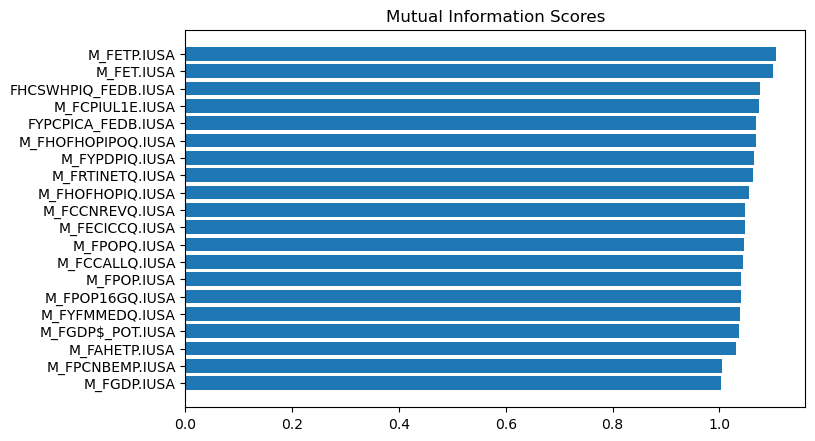

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores[:20])